# **Household Electric Power Consumption**

This dataset contains measurements of electricity consumption in a household with a sampling rate of one minute over almost four years (from December 2006 to November 2010). It includes a total of 2,075,259 measurements and encompasses various electrical quantities as well as some sub-metering values.
Dataset Characteristics:

    Multivariate: Contains multiple variables
    Time-Series: The data is temporally ordered

Tasks:

    Regression Analysis: Investigate how different factors influence electricity consumption
    Clustering Analysis: Identify groups with similar consumption patterns

Important Notes:

    The calculation of active energy consumption (in watt-hours) is performed using the formula:
    Active Energy=global_active_power×100060−sub_metering_1−sub_metering_2−sub_metering_3
    Active Energy=60global_active_power×1000​−sub_metering_1−sub_metering_2−sub_metering_3

    This formula indicates how much energy is consumed by electrical devices that are not measured by sub-meterings 1, 2, and 3.

    There are some missing values in the measurements (about 1.25% of the rows). Although all timestamps are present, measurement values are missing for certain timestamps. A missing value is indicated by the absence of a value between two consecutive semicolon separators. For example, on April 28, 2007, some measurement values are not present.


**Data Dictionary**

| Column Name             | Description                       | Turkish Translation              |
|-------------------------|-----------------------------------|----------------------------------|
| Global_active_power     | Globale aktive Leistung            | Küresel Aktif Güç                |
| Global_reactive_power   | Globale reaktive Leistung          | Küresel Reaktif Güç              |
| Voltage                 | Spannung                           | Voltaj                            |
| Global_intensity        | Globale Intensität                | Küresel Yoğunluk                 |
| Sub_metering_1         | Teilzähler 1                      | Alt Sayacı 1                     |
| Sub_metering_2         | Teilzähler 2                      | Alt Sayacı 2                     |
| Sub_metering_3         | Teilzähler 3                      | Alt Sayacı 3                     |
| datetime                | Datum und Uhrzeit                 | Tarih ve Saat                    |

<img src='https://pfst.cf2.poecdn.net/base/image/3798218b30fdeb59a6cde6b8aa5d80d5a35cc48f7d042a0f81fc6247283b8c77?w=1024&h=768&pmaid=276646458' width='800'>
<a href='https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set' target=_blank>
Click here for the dataset </a>

**Import library**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household_power_consumption.txt


In [3]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [4]:
# Datei einlesen
file_path = '/kaggle/input/household_power_consumption.txt'


# Daten einlesen
data = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?')

Burda data'nin sadece bir parcasini kullanmak istiyorum

In [5]:
# Zufällige Stichprobe von 1000 Zeilen
sample_data = data.sample(n=1000, random_state=42)

**Data Processing**

In [6]:
# Combine Date and Time columns into a datetime column with the correct format
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop original Date and Time columns if not needed
data.drop(columns=['Date', 'Time'], inplace=True)

# Ersten Blick auf die Daten werfen
print(data.head())

   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            datetime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  


In [7]:
data.shape

(2075259, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [9]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64

In [10]:
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
datetime                 0.000000
dtype: float64


In [11]:
data_cleaned = data.dropna()

In [12]:
data.dropna(inplace=True) 

In [13]:
# Dokumentation für df.dropna()
dropna_documentation = """
Dokumentation für data.dropna():

- Beschreibung:
  data.dropna() entfernt alle Zeilen aus dem DataFrame, die mindestens einen fehlenden (NaN) Wert enthalten.

- Verwendung:
  data_cleaned = data.dropna()

- Vorteile:
  - Einfachheit: Löschen von Zeilen mit fehlenden Werten ist effektiv, wenn die Anzahl der fehlenden Werte klein ist.
  - Vermeidung von Verzerrungen: Dies verhindert mögliche Verzerrungen, die durch das Füllen mit Null entstehen könnten.
"""

print(dropna_documentation)


Dokumentation für data.dropna():

- Beschreibung:
  data.dropna() entfernt alle Zeilen aus dem DataFrame, die mindestens einen fehlenden (NaN) Wert enthalten.

- Verwendung:
  data_cleaned = data.dropna()

- Vorteile:
  - Einfachheit: Löschen von Zeilen mit fehlenden Werten ist effektiv, wenn die Anzahl der fehlenden Werte klein ist.
  - Vermeidung von Verzerrungen: Dies verhindert mögliche Verzerrungen, die durch das Füllen mit Null entstehen könnten.



In [14]:
import seaborn as sns

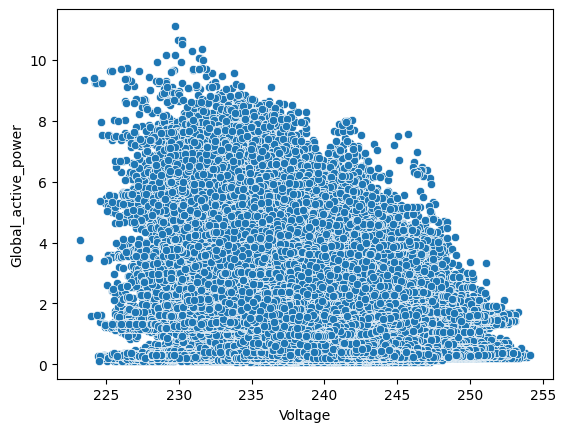

In [15]:
sns.scatterplot(x='Voltage',y='Global_active_power',data=data);

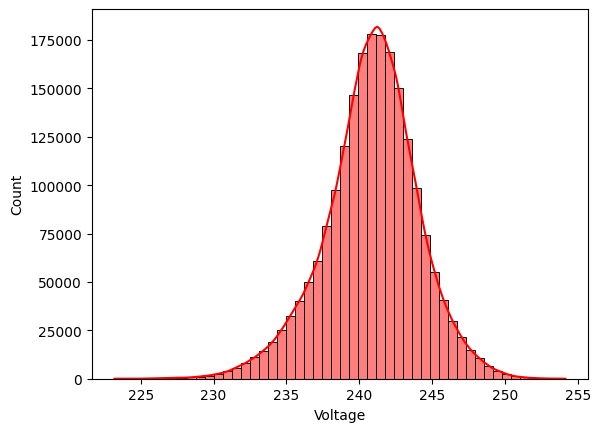

In [16]:
sns.histplot(x=data['Voltage'],kde=True,color='red',bins=50);  

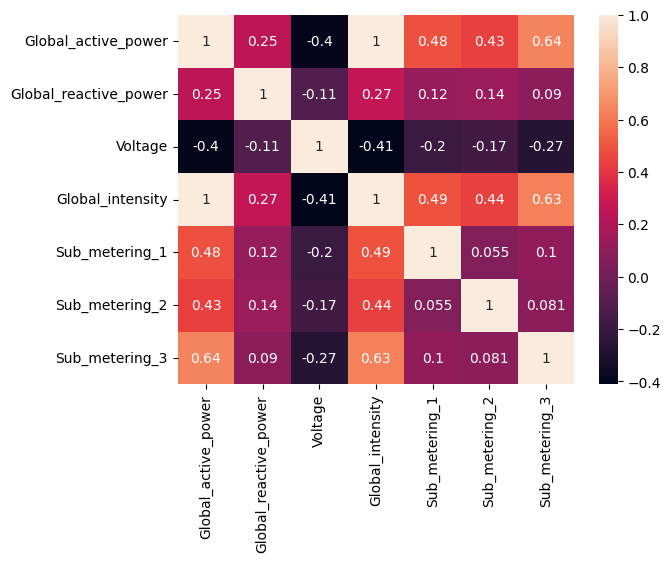

In [17]:
sns.heatmap(data.corr(numeric_only=True),annot=True);

**Feature Engineering**

In [18]:
data.corr(numeric_only=True)   

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [19]:
x = data[['Voltage', 'Global_intensity']]
y = data['Global_active_power']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
x_train.shape, x_test.shape

((1639424, 2), (409856, 2))

**Modelling**

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
model=lr.fit(x_train,y_train)

In [25]:
tahmin=model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
25**0.5

5.0

In [28]:
mean_squared_error(y_test,tahmin)**.5 

0.047867495125581826

In [29]:
r2_score(y_test,tahmin)

0.997961376949575

In [ ]:
#

**K -Means Clustering**

In [30]:
x = data[['Voltage', 'Global_intensity']]

In [31]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [32]:
x.head()

,Voltage,Global_intensity
0,234.84,18.4
1,233.63,23.0
2,233.29,23.0
3,233.74,23.0
4,235.68,15.8


In [33]:
model=KMeans(4) 

In [34]:
model=model.fit(x)   

In [35]:
tahmin=model.predict(x)

In [36]:
tahmin

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [37]:
x['cluster']=tahmin 

In [38]:
x.head()

,Voltage,Global_intensity,cluster
0,234.84,18.4,2
1,233.63,23.0,2
2,233.29,23.0,2
3,233.74,23.0,2
4,235.68,15.8,2


In [ ]:
silhouette_score(x,tahmin)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x['Voltage'], x['Global_intensity'], c=tahmin, cmap='viridis')
plt.colorbar(label='Cluster-Zuordnung')
plt.xlabel("Voltage (V)")
plt.ylabel('Global Intensity (A)')
plt.title('Clustering von Voltage und Global Intensity')
plt.show()

In [ ]:
sns.lineplot(x=range(2,10),y=wcss,marker='*');

In [ ]:
# wcss= with cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

**K - Means Clustering**

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

**Summary**

The dataset under examination consists of electricity consumption measurements from a household over nearly four years, with a total of 2,075,259 entries recorded at one-minute intervals. It includes multiple variables and is structured as a time series, allowing for detailed analysis of consumption patterns.
Tasks Undertaken:

    Regression Analysis:
        The analysis aimed to understand how various factors influence electricity consumption.
        The performance of the regression model was evaluated using two key metrics:
            Root Mean Squared Error (RMSE): 0.0479, indicating a low level of error in predictions.
            R² Score: 0.9980, suggesting that the model explains approximately 99.8% of the variance in electricity consumption, demonstrating a strong fit.

    Clustering Analysis:
        Clustering was performed to identify distinct groups with similar consumption patterns, although specific results from this analysis were not detailed.

Important Considerations:

    The calculation of active energy consumption was based on the provided formula, which accounts for the global active power and sub-metering values.
    The dataset has about 1.25% missing values, which were noted but not elaborated on in the results.

**Conclusion**

The analysis reveals a robust model for predicting electricity consumption, indicated by high R² scores and low RMSE. Further investigations into clustering could provide insights into consumption behavior patterns within the household.

In [ ]:
# The clustering model doesn't work because the dataset is probably too large
# Yani calismasi sinirli sekilde bile bitmedi, o nedenle biraktim öyle.